In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_excel("Public_Transport_Trips_EDA.xlsx")

In [16]:
df.head()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11
0,TRIP0001,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,NaN,F
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,NaN,F
2,TRIP0003,bus,Central,North Station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday,NaN,F
3,TRIP0004,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday,NaN,F
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday,NaN,F


In [17]:
df.shape

(1000, 12)

In [18]:
df.columns

Index(['Trip_ID', 'Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Departure_Time', 'Passenger_Count', 'Fare_Amount',
       'Trip_Duration_Minutes', 'Trip_Date', 'Day_of_Week', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   datetime64[ns]
 5   Passenger_Count        900 non-null    float64       
 6   Fare_Amount            900 non-null    float64       
 7   Trip_Duration_Minutes  900 non-null    float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
 10  Unnamed: 10            0 non-null      float64       
 11  Unnamed: 11            299 non-null    object        
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 93.9+

In [20]:
#Numerical Statistical Analysis
df.describe()

,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Unnamed: 10
count,1000,900.000000,900.000000,900.000000,1000,0.0
mean,2024-01-01 14:19:30,49.154444,25.360742,94.270000,2024-01-21 08:03:50.400000,NaN
min,2024-01-01 06:00:00,1.000000,0.500576,5.000000,2024-01-01 00:00:00,NaN
25%,2024-01-01 10:09:45,25.000000,12.818196,49.750000,2024-01-11 00:00:00,NaN
50%,2024-01-01 14:19:30,48.000000,25.403856,97.500000,2024-01-21 00:00:00,NaN
75%,2024-01-01 18:29:15,72.000000,37.866623,138.000000,2024-02-01 00:00:00,NaN
max,2024-01-01 22:39:00,99.000000,49.945184,179.000000,2024-02-11 00:00:00,NaN
std,NaN,27.698270,14.464556,50.634982,NaN,NaN


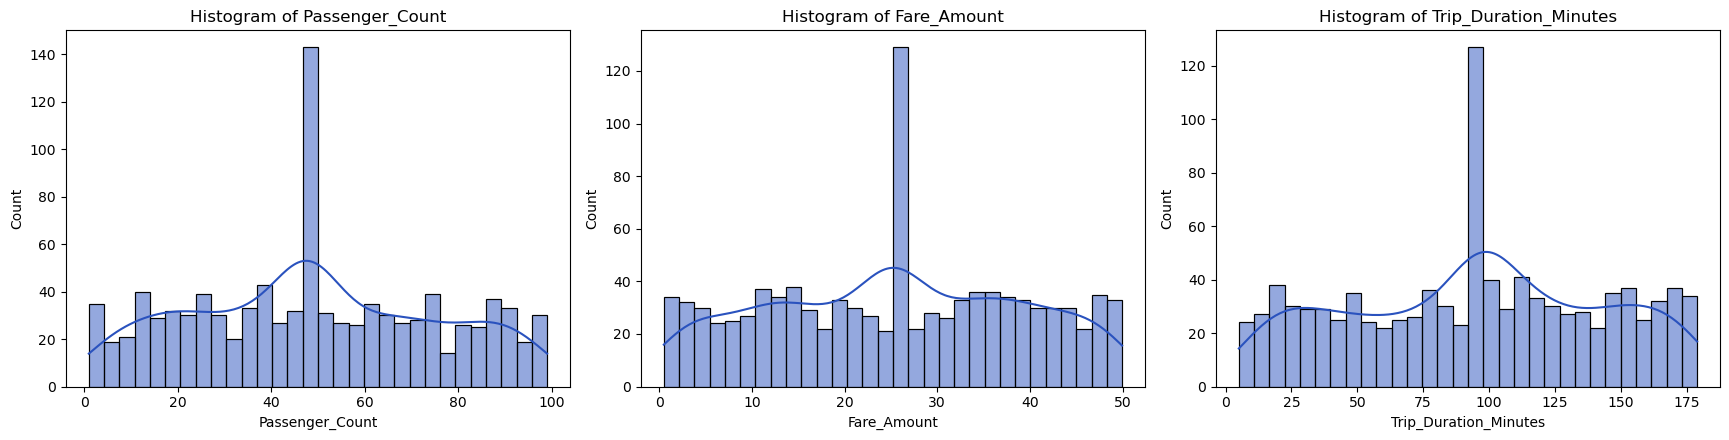

In [55]:
num_cols = ["Passenger_Count", "Fare_Amount", "Trip_Duration_Minutes"]

fig, axes = plt.subplots(1, len(num_cols), figsize=(5.8 * len(num_cols), 4.5))

for i, col in enumerate(num_cols):
    sns.histplot(
        data=df,
        x=col,
        bins=30,
        kde=True,
        ax=axes[i],
        color="#2A52BE"     # cerulean blue
    )
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


- Passenger counts, fare amounts, and trip durations are all right-skewed, The medians (48 passengers, $25.4, 97.5 mins) are well below the maximums, indicating a few unusually large trips.

In [21]:
#Categorical Statistical Analysis
df.describe(include='all')

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11
count,1000,1000,1000,1000,1000,900.000000,900.000000,900.000000,1000,1000,0.0,299
unique,1000,9,7,7,NaN,NaN,NaN,NaN,NaN,7,NaN,2
top,TRIP0001,Bus,North Station,South Point,NaN,NaN,NaN,NaN,NaN,Sunday,NaN,F
freq,1,147,171,171,NaN,NaN,NaN,NaN,NaN,167,NaN,250
mean,NaN,NaN,NaN,NaN,2024-01-01 14:19:30,49.154444,25.360742,94.270000,2024-01-21 08:03:50.400000,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2024-01-01 06:00:00,1.000000,0.500576,5.000000,2024-01-01 00:00:00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2024-01-01 10:09:45,25.000000,12.818196,49.750000,2024-01-11 00:00:00,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2024-01-01 14:19:30,48.000000,25.403856,97.500000,2024-01-21 00:00:00,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2024-01-01 18:29:15,72.000000,37.866623,138.000000,2024-02-01 00:00:00,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,2024-01-01 22:39:00,99.000000,49.945184,179.000000,2024-02-11 00:00:00,NaN,NaN,NaN


In [22]:
df.isnull().sum()

Trip_ID                     0
Mode_of_Transport           0
Departure_Station           0
Arrival_Station             0
Departure_Time              0
Passenger_Count           100
Fare_Amount               100
Trip_Duration_Minutes     100
Trip_Date                   0
Day_of_Week                 0
Unnamed: 10              1000
Unnamed: 11               701
dtype: int64

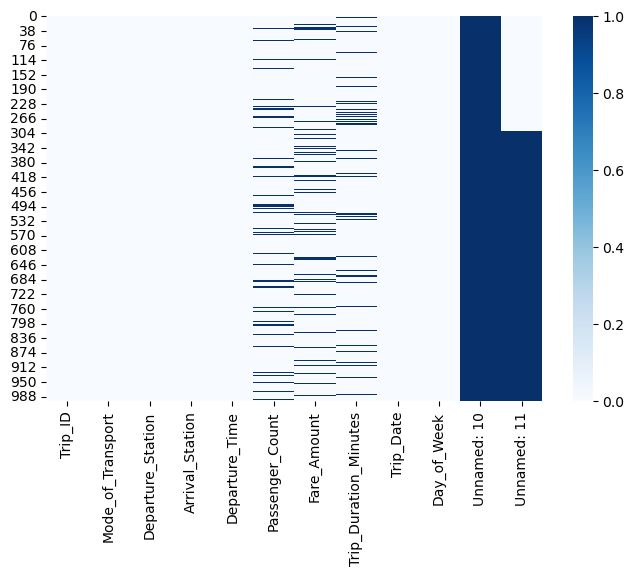

In [23]:
#Visualize missing data
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues");

In [24]:
df.drop(columns=['Trip_ID'], inplace=True)
df.drop(columns=['Unnamed: 10'], inplace=True)
df.drop(columns=['Unnamed: 11'], inplace=True)

In [25]:
# Convert all object columns to string
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

In [26]:
num_cols = ['Passenger_Count', 'Fare_Amount', 'Trip_Duration_Minutes']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [27]:
#Extract time features
df['Hour'] = df['Departure_Time'].dt.hour
df['Day_of_Week'] = df['Trip_Date'].dt.day_name()

In [28]:
#Create time of day
def time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df['time_of_day'] = df['Hour'].apply(time_of_day)

In [29]:
#Add revenue and route
df['Revenue'] = df['Passenger_Count'] * df['Fare_Amount']
df['Route'] = df['Departure_Station'] + " → " + df['Arrival_Station']

In [30]:
#Convert everything in the Mode_of_Transport column to uppercase and keep only the four main categories
df['Mode_of_Transport'] = df['Mode_of_Transport'].str.strip().str.upper()

mapping = {
    'BUS': 'BUS',
    'Bus': 'BUS',
    'Ferry': 'FERRY',
    'FErry': 'FERRY',
    'Train': 'TRAIN',
    'train': 'TRAIN',
    'Tram': 'TRAM'
}

In [31]:
#Summary by transport mode
df.groupby('Mode_of_Transport').agg({
    'Passenger_Count': ['sum', 'mean'],
    'Revenue': 'sum',
    'Trip_Duration_Minutes': 'mean'
})


Passenger_Count                   Revenue  \
                              sum       mean            sum   
Mode_of_Transport                                             
BUS                       16280.0  49.036145  410929.647242   
FERRY                     14304.0  49.839721  356903.111660   
TRAIN                     11435.0  47.057613  306669.390974   
TRAM                       7020.0  50.869565  174166.026843   

                  Trip_Duration_Minutes  
                                   mean  
Mode_of_Transport                        
BUS                           96.338855  
FERRY                         92.125436  
TRAIN                         94.679012  
TRAM                          95.373188

- Bus carries the highest total passengers and generates the most revenue, but Tram actually has the highest average passengers per trip.

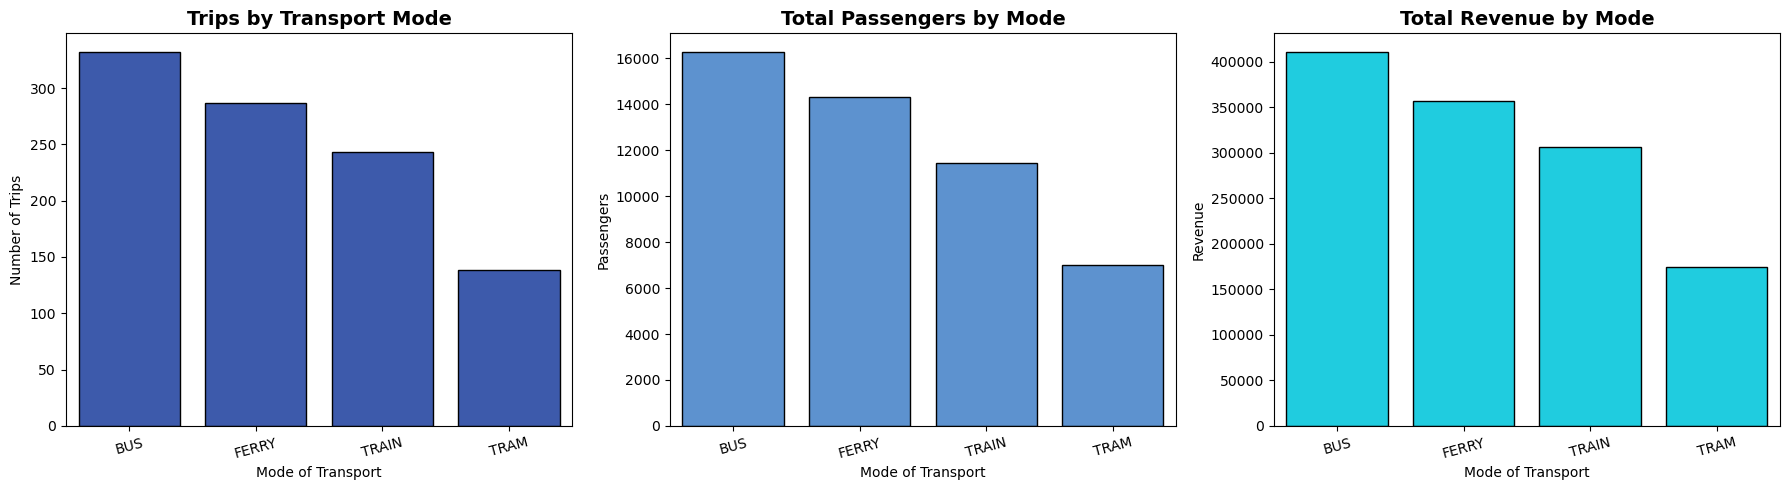

In [56]:
mode_order = df["Mode_of_Transport"].value_counts().index

# 2) aggregated data
agg_passengers = (
    df.groupby("Mode_of_Transport", as_index=False)["Passenger_Count"]
      .sum()
)

agg_revenue = (
    df.groupby("Mode_of_Transport", as_index=False)["Revenue"]
      .sum()
)


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#Plot 1: Trips by Transport Mode (countplot)
sns.countplot(
    data=df,
    x="Mode_of_Transport",
    order=mode_order,
    color="#2A52BE",      
    edgecolor="black",
    ax=axes[0]
)
axes[0].set_title("Trips by Transport Mode", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Mode of Transport")
axes[0].set_ylabel("Number of Trips")
axes[0].tick_params(axis="x", rotation=15)

#Plot 2: Total Passengers by Mode
sns.barplot(
    data=agg_passengers,
    x="Mode_of_Transport",
    y="Passenger_Count",
    order=mode_order,
    color="#4A90E2",         
    edgecolor="black",
    ax=axes[1]
)
axes[1].set_title("Total Passengers by Mode", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Mode of Transport")
axes[1].set_ylabel("Passengers")
axes[1].tick_params(axis="x", rotation=15)

#Plot 3: Total Revenue by Mode
sns.barplot(
    data=agg_revenue,
    x="Mode_of_Transport",
    y="Revenue",
    order=mode_order,
    color="#00E5FF",        
    edgecolor="black",
    ax=axes[2]
)
axes[2].set_title("Total Revenue by Mode", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Mode of Transport")
axes[2].set_ylabel("Revenue")
axes[2].tick_params(axis="x", rotation=15)

plt.tight_layout()
plt.show()

- Across trips, passengers, and revenue, Bus consistently leads, followed by Ferry and Train, while Tram is the least used and least profitable mode.

In [32]:
#Top 10 routes by passengers
df.groupby('Route')['Passenger_Count'].sum().sort_values(ascending=False).head(10)

Route
North Station → Downtown    1907.0
Central → North Station     1644.0
Central → West End          1545.0
Airport → West End          1527.0
West End → South Point      1521.0
North Station → Airport     1495.0
West End → Airport          1477.0
South Point → Airport       1458.0
Downtown → South Point      1457.0
Downtown → Downtown         1433.0
Name: Passenger_Count, dtype: float64

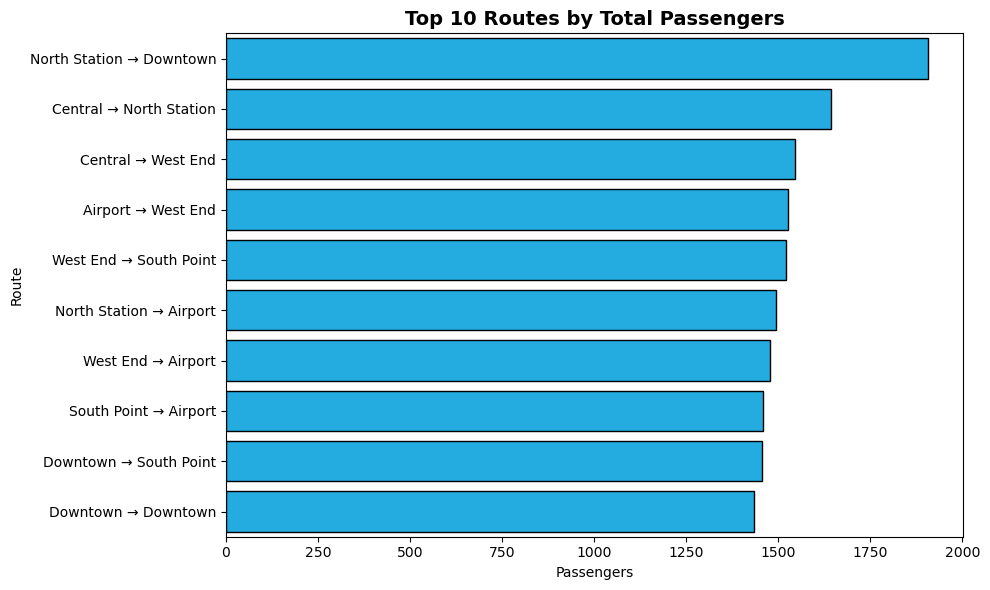

In [58]:
top_routes = (
    df.groupby("Route")["Passenger_Count"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

# 2. Plot (horizontal bar chart)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_routes,
    x="Passenger_Count",
    y="Route",
    color="#05B9FF",     
    edgecolor="black"
)

plt.title("Top 10 Routes by Total Passengers", fontsize=14, fontweight="bold")
plt.xlabel("Passengers")
plt.ylabel("Route")
plt.tight_layout()
plt.show()

- The route North Station → Downtown is the busiest, carrying more passengers than any other route, with several Central and Airport connections also ranking in the top 10.

In [33]:
# Count the number of trips by each time of day
time_counts = (
    df['time_of_day']
    .value_counts()
    .reindex(['Morning', 'Afternoon', 'Evening', 'Night']) 
    .dropna()
    .reset_index()
)

# Rename columns
time_counts.columns = ['Time_of_Day', 'Trips']

print(time_counts)

  Time_of_Day  Trips
0     Morning    360
1   Afternoon    300
2     Evening    240
3       Night    100


C:\Users\Admin\AppData\Local\Temp\ipykernel_40148\2885092694.py:2: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


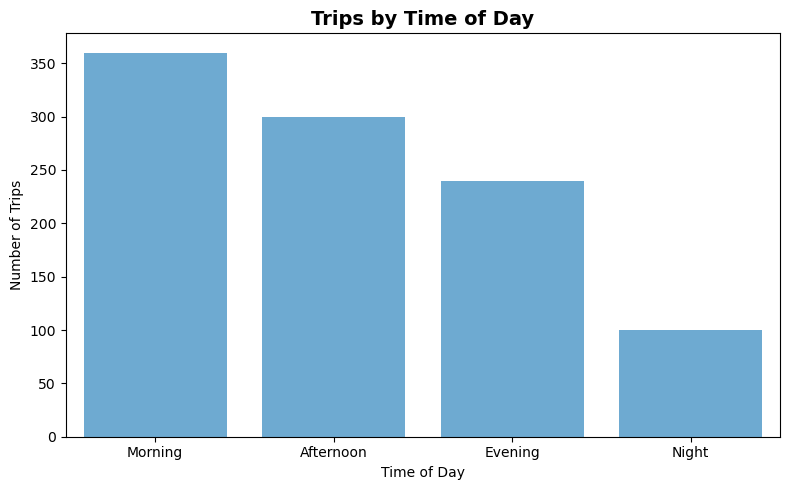

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=time_counts,
    x='Time_of_Day', y='Trips',
    hue='Time_of_Day',
    dodge=False,
    palette=["#5DADE2"],  
    legend=False
)
plt.title('Trips by Time of Day', fontsize=14, fontweight='bold')
plt.xlabel('Time of Day')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

- Most trips happen in the morning (360) and afternoon (300), with activity dropping off in the evening and reaching its lowest point at night.

In [34]:
# Aggregate total revenue by transport mode
agg_revenue = (
    df.groupby('Mode_of_Transport', as_index=False)['Revenue']
      .sum()
      .sort_values('Revenue', ascending=False)
)
print(agg_revenue)

  Mode_of_Transport        Revenue
0               BUS  410929.647242
1             FERRY  356903.111660
2             TRAIN  306669.390974
3              TRAM  174166.026843


- Bus is the top revenue generator, followed by Ferry and Train, while Tram brings in the least revenue among the four modes.

In [35]:
num_cols = ['Passenger_Count', 'Fare_Amount', 'Trip_Duration_Minutes', 'Revenue']
df[num_cols].describe()

,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.039000,25.365053,94.593000,1248.668177
std,26.277709,13.721526,48.043673,1027.743269
min,1.000000,0.500576,5.000000,4.191420
25%,28.000000,13.917364,55.000000,393.404987
50%,48.000000,25.403856,97.500000,983.888969
75%,70.000000,36.580122,132.250000,1914.469950
max,99.000000,49.945184,179.000000,4826.548112


- Revenue and trip duration both show a wide spread (big gap between median and max), meaning a few trips are much longer and much more expensive than most others.

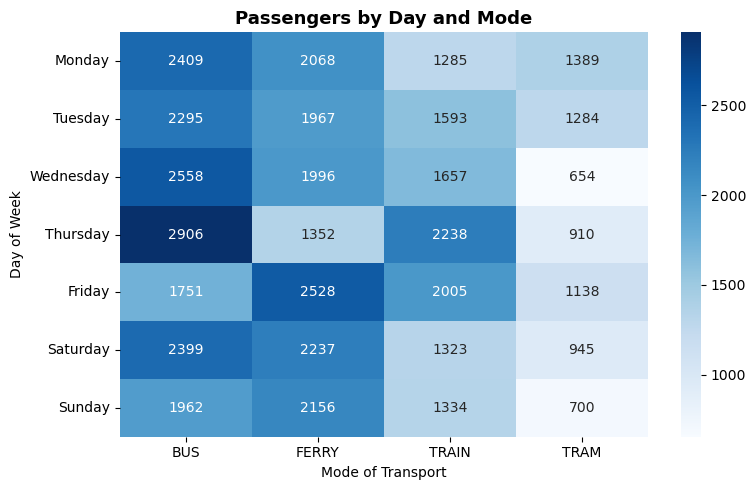

In [44]:
pivot = (
    df.pivot_table(
        index="Day_of_Week",
        columns="Mode_of_Transport",
        values="Passenger_Count",
        aggfunc="sum"
    )
    .reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
)

plt.figure(figsize=(8,5))
sns.heatmap(
    pivot,
    annot=True,
    fmt=".0f",
    cmap="Blues"   
)
plt.title("Passengers by Day and Mode", fontsize=13, fontweight="bold")
plt.xlabel("Mode of Transport")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


- Passenger volumes peak on Thursdays (driven mainly by buses), while trams stay the least used across all days.

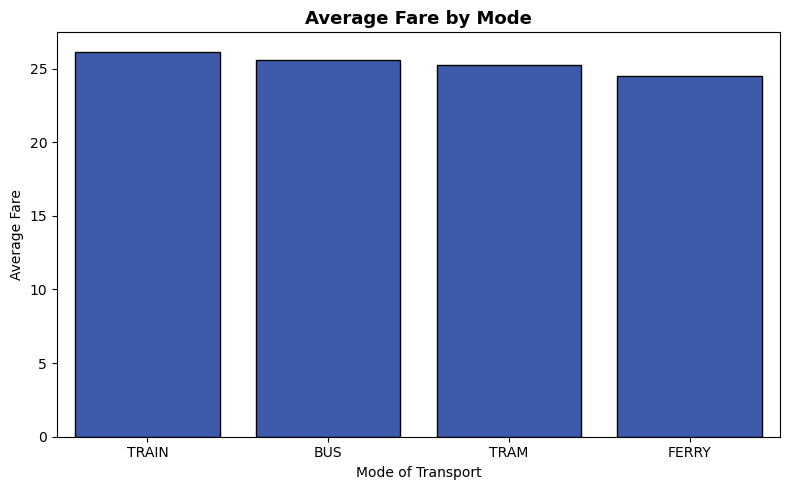

In [45]:
avg_fare = (
    df.groupby("Mode_of_Transport", as_index=False)["Fare_Amount"]
      .mean()
)

order = avg_fare.sort_values("Fare_Amount", ascending=False)["Mode_of_Transport"]

# 3. plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=avg_fare,
    x="Mode_of_Transport",
    y="Fare_Amount",
    order=order,              
    color="#2A52BE",
    edgecolor="black"
)
plt.title("Average Fare by Mode", fontsize=13, fontweight="bold")
plt.xlabel("Mode of Transport")
plt.ylabel("Average Fare")
plt.tight_layout()
plt.show()

- Average fares are tightly clustered ($25), with TRAIN highest and FERRY lowest.

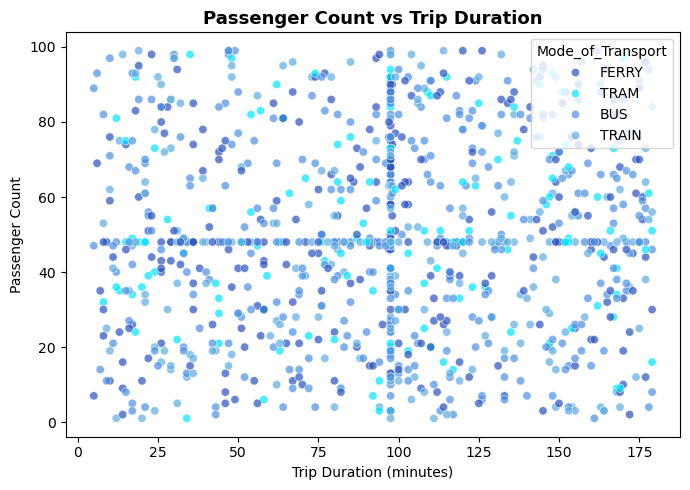

In [46]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="Trip_Duration_Minutes",
    y="Passenger_Count",
    hue="Mode_of_Transport",
    palette=["#2A52BE", "#00E5FF", "#4A90E2", "#5DADE2"],
    alpha=0.7
)
plt.title("Passenger Count vs Trip Duration", fontsize=13, fontweight="bold")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Passenger Count")
plt.tight_layout()
plt.show()

- Passenger counts stay fairly stable across trip lengths (no strong correlation), and this pattern is consistent for all transport modes.

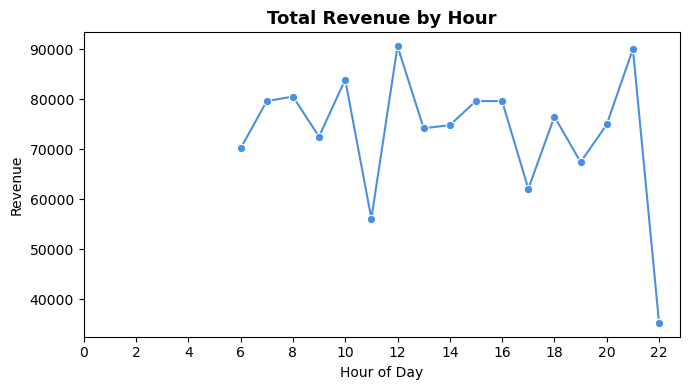

In [47]:
df["Hour"] = pd.to_datetime(df["Departure_Time"]).dt.hour

rev_by_hour = (
    df.groupby("Hour")["Revenue"]
      .sum()
      .reset_index()
      .sort_values("Hour")
)

plt.figure(figsize=(7,4))
sns.lineplot(
    data=rev_by_hour,
    x="Hour",
    y="Revenue",
    marker="o",
    color="#4A90E2"
)
plt.title("Total Revenue by Hour", fontsize=13, fontweight="bold")
plt.xlabel("Hour of Day")
plt.ylabel("Revenue")
plt.xticks(range(0,24,2))
plt.tight_layout()
plt.show()

- Revenue peaks around noon (12:00) and again around 9 PM (21:00), with a sharp dip late morning (11:00) and the lowest level late night (22:00).

C:\Users\Admin\AppData\Local\Temp\ipykernel_40148\3295558052.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


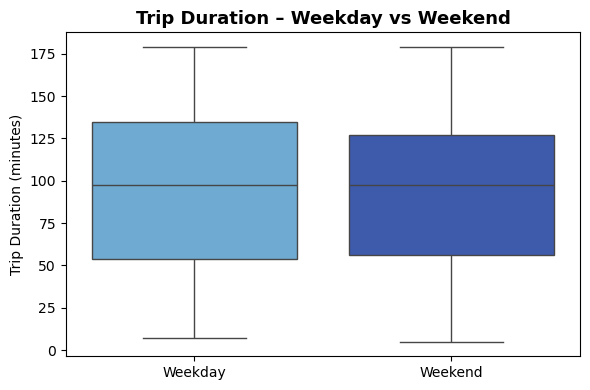

In [48]:
df["Is_Weekend"] = df["Day_of_Week"].isin(["Saturday", "Sunday"])

plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="Is_Weekend",
    y="Trip_Duration_Minutes",
    palette=["#5DADE2", "#2A52BE"]
)
plt.xticks([0,1], ["Weekday", "Weekend"])
plt.title("Trip Duration – Weekday vs Weekend", fontsize=13, fontweight="bold")
plt.xlabel("")
plt.ylabel("Trip Duration (minutes)")
plt.tight_layout()
plt.show()

- Weekday and weekend trips have almost the same typical duration (around 95–100 minutes), but both periods show a wide spread with some very long trips.

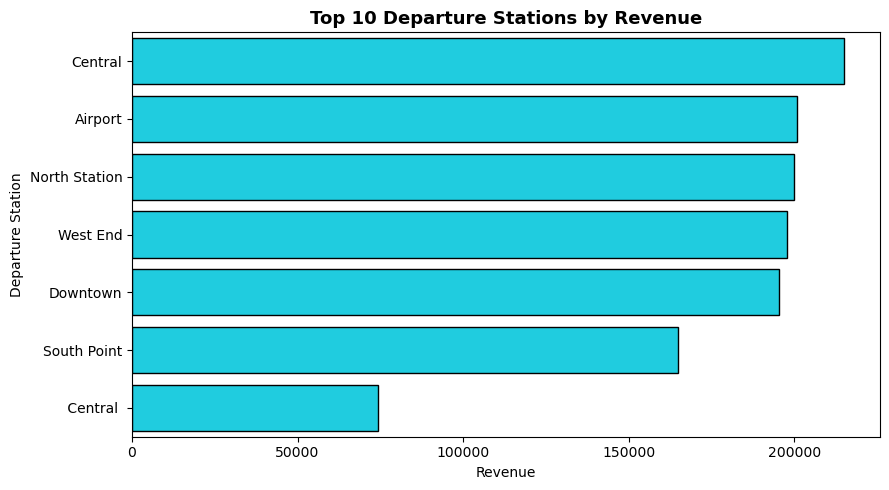

In [50]:
top_stations = (
    df.groupby("Departure_Station")["Revenue"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

plt.figure(figsize=(9,5))
sns.barplot(
    data=top_stations,
    x="Revenue",
    y="Departure_Station",
    color="#00E5FF",
    edgecolor="black"
)
plt.title("Top 10 Departure Stations by Revenue", fontsize=13, fontweight="bold")
plt.xlabel("Revenue")
plt.ylabel("Departure Station")
plt.tight_layout()
plt.show()

- Central is the top-earning departure station, with Airport, North Station, West End, and Downtown all generating very similar high revenues, while South Point brings in noticeably less.

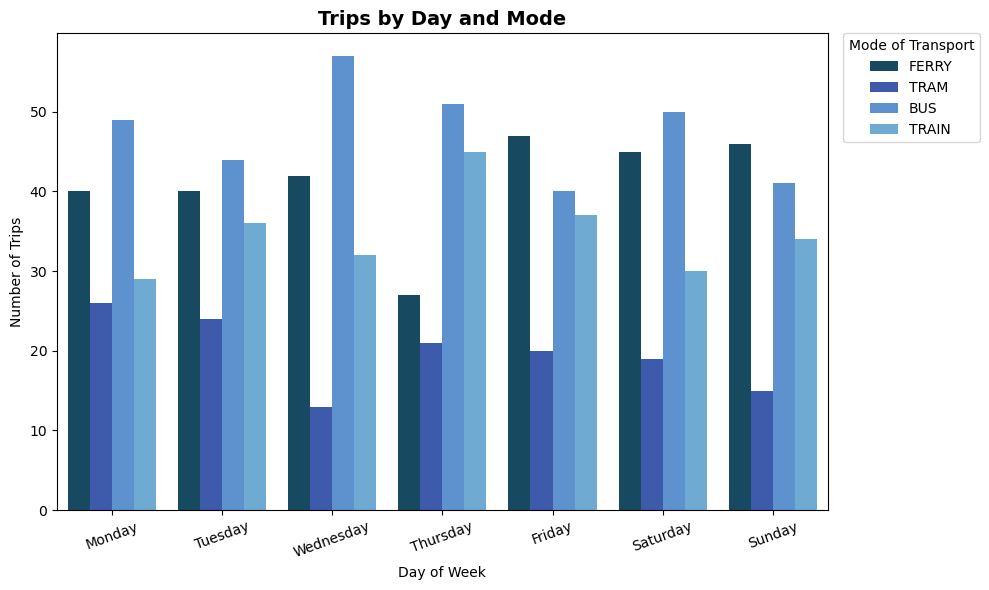

In [51]:
day_order = (
    df["Day_of_Week"]
      .value_counts()
      .sort_values(ascending=False)
      .index
)

blue_palette = ["#0B4F6C", "#2A52BE", "#4A90E2", "#5DADE2"]

plt.figure(figsize=(10, 6))   # bigger figure
ax = sns.countplot(
    data=df,
    x="Day_of_Week",
    hue="Mode_of_Transport",
    order=day_order,
    palette=blue_palette
)

plt.title("Trips by Day and Mode", fontsize=14, fontweight="bold")
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.xticks(rotation=20)

# move legend outside, left-aligned
plt.legend(
    title="Mode of Transport",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0
)

plt.tight_layout()
plt.show()



- Bus remains the busiest mode across the week (peaking mid-week), while tram consistently records the fewest trips, and Thursday shows a dip for ferry but a spike for train.

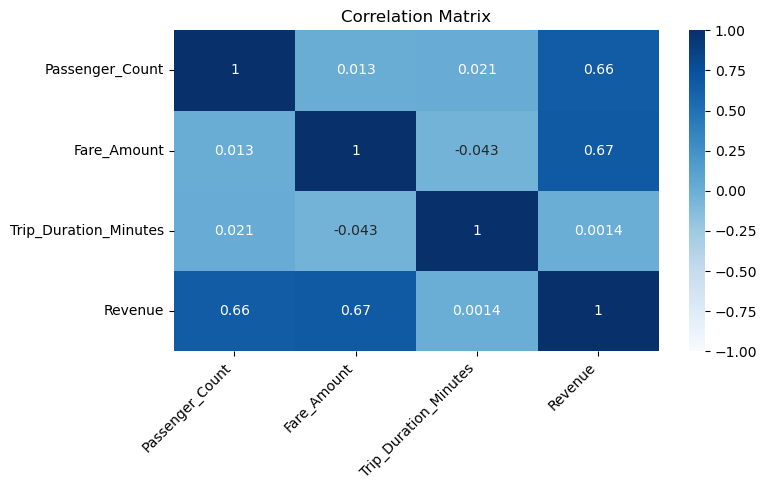

In [52]:
num_df = df[["Passenger_Count", "Fare_Amount", "Trip_Duration_Minutes", "Revenue"]].copy()
corr = num_df.corr()

plt.figure(figsize=(8,5))
ax = sns.heatmap(corr, annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.title("Correlation Matrix")

# rotate x + y labels
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


- Revenue rises mainly with more passengers and higher fares (both ~0.66–0.67 correlation), while trip duration has almost no relationship with revenue or the other metrics.

In [59]:
df.to_csv('cleaned_public_transport_trips.csv', index=False)